**DATA PROCESSING: INDONESIAN COVID-19 CASES** by Faisal Adam Yudithia

# A. DATA COLLECTION & UNDERSTANDING

Import all packages needed.

In [1]:
import requests as rq
import json
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

## A.1. Get the Indonesian COVID-19 Public Data in JSON Format

In [2]:
# Get the puplic data by request from the server
resp = rq.get('https://data.covid19.go.id/public/api/update.json')

# View the server’s response headers
print('Date of Access : ' + resp.headers['Date'])
print('Content Type : ' + resp.headers['Content-Type'])

# Get the content of the data
data_json = resp.content

Date of Access : Tue, 16 Nov 2021 08:30:26 GMT
Content Type : application/json


## A.2. Convert the Data Content in JSON Format to Python

In [3]:
# Convert the data format from JSON to Python
data_py = json.loads(data_json)

## A.3. Exploring the Data Content

### A.3.1. Get the Dictionary Keys

In [4]:
# View the key list of the data in dictionary data type
print('List of Keys:')
for k in dict.keys(data_py):
    print('- ' + k)

List of Keys:
- data
- update


In [5]:
# View the key list of the 'data' key inside the data
print('List of Keys:')
for k in dict.keys(data_py['data']):
    print('- ' + k)

List of Keys:
- id
- jumlah_odp
- jumlah_pdp
- total_spesimen
- total_spesimen_negatif


In [6]:
# View the key list of the 'update' key inside the data
print('List of Keys:')
for k in dict.keys(data_py['update']):
    print('- ' + k)

List of Keys:
- penambahan
- harian
- total


In [7]:
# View the key list of the 'harian' key inside the 'update' key
print('List of Keys:')
for k in dict.keys(data_py['update']['harian'][0]):
    print('- ' + k)

List of Keys:
- key_as_string
- key
- doc_count
- jumlah_meninggal
- jumlah_sembuh
- jumlah_positif
- jumlah_dirawat
- jumlah_positif_kum
- jumlah_sembuh_kum
- jumlah_meninggal_kum
- jumlah_dirawat_kum


### A.3.2 Get the Keys and Their Values

In [8]:
# Get the information of total specimen
print('Total Specimen:')
for k, v in data_py['data'].items():
    print('- ' + k, v)

Total Specimen:
- id 1
- jumlah_odp 3845
- jumlah_pdp 0
- total_spesimen 50382458
- total_spesimen_negatif 40800748


In [9]:
# Get the information of total cases
print('Total Cases:')
for k, v in data_py['update']['total'].items():
    print('- ' + k, v)

Total Cases:
- jumlah_positif 4251076
- jumlah_dirawat 8522
- jumlah_sembuh 4098884
- jumlah_meninggal 143670


In [10]:
# Get the information of last case addition
print('Last Case Addition:')
for k, v in data_py['update']['penambahan'].items():
    print('- ' + k, v)

Last Case Addition:
- jumlah_positif 221
- jumlah_meninggal 11
- jumlah_sembuh 706
- jumlah_dirawat -496
- tanggal 2021-11-15
- created 2021-11-15 17:12:28


### A.3.3. Hindsight

In [11]:
print('Cases increase percentage:')

# Positive cases increase percentage
print('Positive cases: ' + str(round(data_py['update']['penambahan']['jumlah_positif'] / data_py['update']['total']['jumlah_positif'] * 100, 3)) + '%')

# Recovered cases increase percentage
print('Recovered cases: ' + str(round(data_py['update']['penambahan']['jumlah_sembuh'] / data_py['update']['total']['jumlah_sembuh'] * 100, 3)) + '%')

# Positive cases increase percentage
print('Recovered cases: ' + str(round(data_py['update']['penambahan']['jumlah_meninggal'] / data_py['update']['total']['jumlah_meninggal'] * 100, 3)) + '%')

Cases increase percentage:
Positive cases: 0.005%
Recovered cases: 0.017%
Recovered cases: 0.008%


# B. DATA PREPARATION

## B.1. Import the Daily Cases Data to Pandas DataFrame

In [12]:
# Import the data to dataframe
daily_cases = pd.DataFrame(data_py['update']['harian'])

# Applying values to the columns
daily_cases['jumlah_meninggal'] = daily_cases['jumlah_meninggal'].apply(lambda x: x['value'])
daily_cases['jumlah_sembuh'] = daily_cases['jumlah_sembuh'].apply(lambda x: x['value'])
daily_cases['jumlah_positif'] = daily_cases['jumlah_positif'].apply(lambda x: x['value'])
daily_cases['jumlah_dirawat'] = daily_cases['jumlah_dirawat'].apply(lambda x: x['value'])
daily_cases['jumlah_positif_kum'] = daily_cases['jumlah_positif_kum'].apply(lambda x: x['value'])
daily_cases['jumlah_sembuh_kum'] = daily_cases['jumlah_sembuh_kum'].apply(lambda x: x['value'])
daily_cases['jumlah_meninggal_kum'] = daily_cases['jumlah_meninggal_kum'].apply(lambda x: x['value'])
daily_cases['jumlah_dirawat_kum'] = daily_cases['jumlah_dirawat_kum'].apply(lambda x: x['value'])

# Change the data type
daily_cases['key_as_string'] = pd.to_datetime(daily_cases['key_as_string'])

# Change the column name
daily_cases = daily_cases.rename(columns = {'key_as_string' : 'tanggal'})

# View sample rows of the dataframe
daily_cases.sample(5)

,tanggal,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
133,2020-07-13 00:00:00+00:00,1594598400000,1,50,1051,1282,181,76981,36689,3656,36636
178,2020-08-27 00:00:00+00:00,1598486400000,1,120,3166,2719,-567,162884,118575,7064,37245
197,2020-09-15 00:00:00+00:00,1600128000000,1,124,2660,3507,723,225030,161065,8965,55000
0,2020-03-02 00:00:00+00:00,1583107200000,1,0,0,2,2,2,0,0,2
477,2021-06-22 00:00:00+00:00,1624320000000,1,335,8375,13668,4958,2018113,1810136,55291,152686


In [13]:
# View information of the dataframe
daily_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tanggal               624 non-null    datetime64[ns, UTC]
 1   key                   624 non-null    int64              
 2   doc_count             624 non-null    int64              
 3   jumlah_meninggal      624 non-null    int64              
 4   jumlah_sembuh         624 non-null    int64              
 5   jumlah_positif        624 non-null    int64              
 6   jumlah_dirawat        624 non-null    int64              
 7   jumlah_positif_kum    624 non-null    int64              
 8   jumlah_sembuh_kum     624 non-null    int64              
 9   jumlah_meninggal_kum  624 non-null    int64              
 10  jumlah_dirawat_kum    624 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(10)
memory usage: 53.8 KB


## B.2. Data Cleaning

In [14]:
# Check if there are duplicate values
daily_cases.duplicated().any()

False

## B.3. Create Monthly Cases DataFrame

In [15]:
# Group by month from the date column
monthly_cases = daily_cases.groupby(daily_cases['tanggal'].dt.strftime('%Y-%m'))[['jumlah_positif', 'jumlah_sembuh', 'jumlah_meninggal']].sum().sort_values(by = 'tanggal').reset_index(drop = False)

# Change the column name
monthly_cases = monthly_cases.rename(columns = {'tanggal' : 'bulan'})

# View the dataframe
monthly_cases

,bulan,jumlah_positif,jumlah_sembuh,jumlah_meninggal
0,2020-03,1528,81,136
1,2020-04,8590,1441,656
2,2020-05,16355,5786,821
3,2020-06,29912,17498,1263
4,2020-07,51991,41101,2255
5,2020-08,66420,60052,2286
6,2020-09,112212,88988,3323
7,2020-10,123080,122854,3129
8,2020-11,128795,112717,3076
9,2020-12,204315,160579,5193


In [16]:
# View information of the dataframe
monthly_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bulan             21 non-null     object
 1   jumlah_positif    21 non-null     int64 
 2   jumlah_sembuh     21 non-null     int64 
 3   jumlah_meninggal  21 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 800.0+ bytes


## A.6. Descriptive Statistics

In [17]:
# Descriptive statistics of the daily cases
daily_cases.describe()

,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
count,6.240000e+02,624.000000,624.000000,624.000000,624.000000,624.000000,6.240000e+02,6.240000e+02,624.000000,624.000000
mean,1.610021e+12,1.003205,230.240385,6568.724359,6812.621795,13.657051,1.366245e+06,1.221004e+06,41907.866987,103332.971154
std,1.557598e+10,0.056568,363.156436,9123.226056,9632.242303,4931.980888,1.458799e+06,1.362515e+06,46877.669885,120261.286411
min,1.583107e+12,1.000000,0.000000,0.000000,0.000000,-25725.000000,2.000000e+00,0.000000e+00,0.000000,2.000000
25%,1.596564e+12,1.000000,52.000000,1082.500000,1238.250000,-659.250000,1.164172e+05,7.342925e+04,5436.000000,27663.000000
50%,1.610021e+12,1.000000,116.000000,3921.500000,4170.500000,150.500000,8.030315e+05,6.631600e+05,23636.500000,63659.000000
75%,1.623478e+12,1.000000,196.250000,7166.250000,6830.750000,674.750000,1.903957e+06,1.741600e+06,52767.250000,125285.000000
max,1.636934e+12,2.000000,2069.000000,48832.000000,56757.000000,36726.000000,4.251076e+06,4.098884e+06,143670.000000,574135.000000


In [18]:
# Descriptive statistics of the monthly cases
monthly_cases.describe()

,jumlah_positif,jumlah_sembuh,jumlah_meninggal
count,2.100000e+01,21.000000,21.000000
mean,2.024322e+05,195184.952381,6841.428571
std,2.840715e+05,264467.683017,10449.267743
min,1.528000e+03,81.000000,136.000000
25%,2.991200e+04,41101.000000,1466.000000
50%,1.253030e+05,122854.000000,3323.000000
75%,2.043150e+05,211294.000000,6168.000000
max,1.231386e+06,990405.000000,38904.000000


# C. DESCRIPTIVE ANALYSIS

## C.1 Set the Default Parameter

In [19]:
plt.rcParams['figure.figsize'] = 16, 6
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['xtick.labelsize'] = 'medium'
plt.rcParams['ytick.labelsize'] = 'medium'
plt.rcParams['axes.titlepad'] = 20

## C.2 Monthly Cases Bar Chart

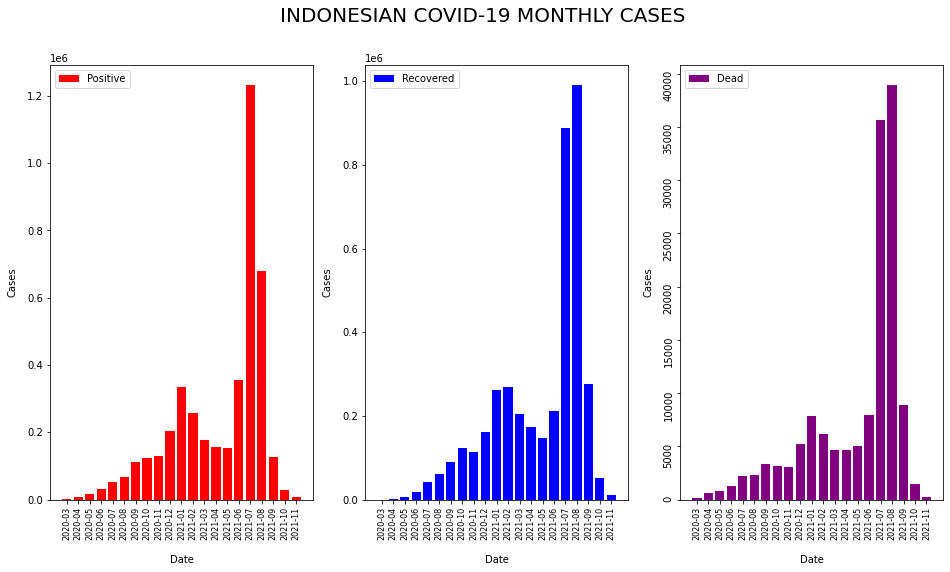

In [20]:
plt.figure(figsize = (16,8))
plt.suptitle('INDONESIAN COVID-19 MONTHLY CASES',
             fontsize = 20)

# Subplot 1: positive cases
plt.subplot(1, 3, 1)
plt.bar(monthly_cases['bulan'],
        monthly_cases['jumlah_positif'],
        color = 'red',
        label = 'Positive')
plt.xlabel('Date',
           labelpad = 15)
plt.ylabel('Cases',
           labelpad = 10)
plt.xticks(rotation = 90,
           fontsize = 8)
plt.yticks(rotation = 0)
plt.legend(loc = 'upper left',
           bbox_to_anchor =(0, 1),
           ncol = 1)

# Subplot 2: recovered cases
plt.subplot(1, 3, 2)
plt.bar(monthly_cases['bulan'],
        monthly_cases['jumlah_sembuh'],
        color = 'blue',
        label = 'Recovered')
plt.xlabel('Date',
           labelpad = 15)
plt.ylabel('Cases',
           labelpad = 10)
plt.xticks(rotation = 90,
           fontsize = 8)
plt.yticks(rotation = 0)
plt.legend(loc = 'upper left',
           bbox_to_anchor =(0, 1),
           ncol = 1)

# Subplot 3: dead cases
plt.subplot(1, 3, 3)
plt.bar(monthly_cases['bulan'],
        monthly_cases['jumlah_meninggal'],
        color = 'purple',
        label = 'Dead')
plt.xlabel('Date',
           labelpad = 15)
plt.ylabel('Cases',
           labelpad = 10)
plt.xticks(rotation = 90,
           fontsize = 8)
plt.yticks(rotation = 90)
plt.legend(loc = 'upper left',
           bbox_to_anchor =(0, 1),
           ncol = 1)

# Show the bar chart
plt.show()

## C.3. Daily Cases Line Chart

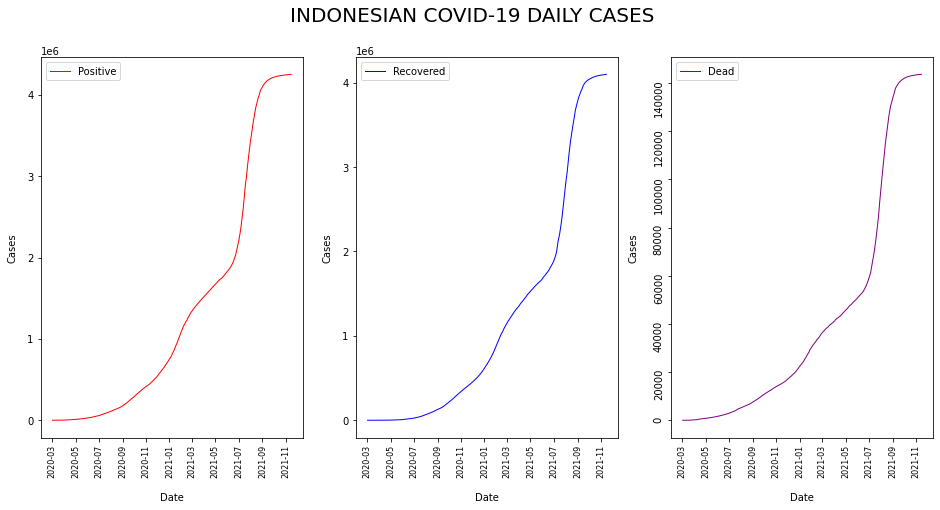

In [21]:
plt.figure(figsize = (16,7))
plt.suptitle('INDONESIAN COVID-19 DAILY CASES',
             fontsize = 20)

# Subplot 1: positive cases
plt.subplot(1, 3, 1)
plt.plot(daily_cases['tanggal'],
         daily_cases['jumlah_positif_kum'],
         color = 'red',
         label = 'Positive')
plt.xlabel('Date',
           labelpad = 15)
plt.ylabel('Cases',
           labelpad = 10)
plt.xticks(rotation = 90,
           fontsize = 8)
plt.yticks(rotation = 0)
plt.legend(loc = 'upper left',
           bbox_to_anchor =(0, 1),
           ncol = 1)

# Subplot 2: recovered cases
plt.subplot(1, 3, 2)
plt.plot(daily_cases['tanggal'],
         daily_cases['jumlah_sembuh_kum'],
         color = 'blue',
         label = 'Recovered')
plt.xlabel('Date',
           labelpad = 15)
plt.ylabel('Cases',
           labelpad = 10)
plt.xticks(rotation = 90,
           fontsize = 8)
plt.yticks(rotation = 0)
plt.legend(loc = 'upper left',
           bbox_to_anchor =(0, 1),
           ncol = 1)

# Subplot 3: dead cases
plt.subplot(1, 3, 3)
plt.plot(daily_cases['tanggal'],
         daily_cases['jumlah_meninggal_kum'],
         color = 'purple',
         label = 'Dead')
plt.xlabel('Date',
           labelpad = 15)
plt.ylabel('Cases',
           labelpad = 15)
plt.xticks(rotation = 90,
           fontsize = 8)
plt.yticks(rotation = 90)
plt.legend(loc = 'upper left',
           bbox_to_anchor =(0, 1),
           ncol = 1)

# Show the line chart
plt.show()

# D. DATA EXPORT

Export the Daily Cases Data to CSV Format

In [22]:
# Current date and time
now = dt.datetime.now().strftime('%Y%m%d_%H%M%S')

# Export to CSV Format
daily_cases.to_csv('indonesian_covid19_daily_' + now +'.csv', index=False)